In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = np.array([np.random.uniform(0, 9) for i in range(1000)])
y = 1.5 * x + np.random.normal(0, 0.5, 1000)

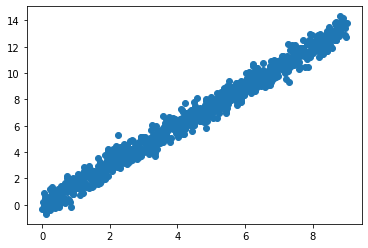

In [3]:
## ORIGINAL POINTS
plt.scatter(x, y)

### Building a linear regression model

In [4]:
def train_test_split(X, y, test_size):
  split_index = int(X.shape[0] * (1 - test_size))
  X_train = X[:split_index]
  y_train = y[:split_index]
  X_test = X[split_index:]
  y_test = y[split_index:]

  return X_train, X_test, y_train, y_test

def fit(X_train, X_test, y_train, y_test):
  # Add column of ones for intercept
  X_train = np.column_stack((X_train, np.ones(X_train.shape[0])))
  X_test = np.column_stack((X_test, np.ones(X_test.shape[0])))

  # Return the normal coefficient : 
  X_T_X = np.dot(X_train.T, X_train)
  X_T_X_inv = np.linalg.inv(X_T_X)
  X_T_y = np.dot(X_train.T, y_train)
  coef = np.dot(X_T_X_inv, X_T_y)

  coef_ = coef[:-1]
  intercept_ = coef[-1]
  return coef_, intercept_

def predict(X, coef, intercept):
  X = np.array(X)
  return (X * coef) + intercept


In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 0.25)
coef, intercept = fit(X_train, X_test, y_train, y_test)
y_pred = predict(X_test, coef, intercept)

y_pred

array([13.04594915,  2.53011564, 11.40019861,  9.45240438,  6.59929145,
        4.74405722, 12.18595514,  6.10590113,  2.14701149,  5.11146184,
        6.65337984,  7.98093759,  0.41966208,  3.48925547,  9.2561285 ,
        2.11902474, 10.2124046 ,  9.36191999,  7.7989387 , 12.35485853,
       13.40742332, 12.37813674,  0.17228103,  4.02600505, 12.57643197,
        7.25626389,  6.20938203,  7.0746811 ,  0.03247609,  2.85113969,
        3.98748025,  4.32417958,  9.24703701, 12.75988019,  3.95291019,
        4.16239299,  5.42874272, 12.15246986, 11.23772787,  6.20929973,
        8.25091477,  0.38249284,  3.547978  , 10.15767053,  4.36272655,
       10.01399625,  9.33626555,  7.97815496,  0.2092831 , 12.99619252,
       12.19292537,  1.90264313,  9.73875553,  4.23810557,  7.4648055 ,
       10.51723313,  9.14900354,  4.67945771,  8.9923647 ,  3.7951716 ,
        0.80167618,  3.16273495,  5.00878705,  6.60974883,  2.47246758,
       10.64077697,  1.84613438,  6.35112501,  3.47704014,  3.25

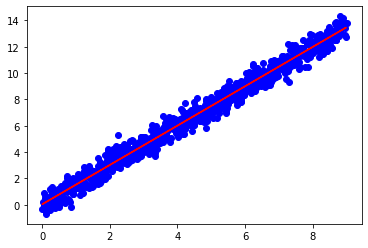

In [6]:
plt.scatter(x, y, color = 'blue')
plt.plot(X_test, y_pred, color = 'red')
plt.show()

### GRADIENT DESCENT

In [7]:
m = 0
c = 0

learning_rate = 0.01
iterations = 1000

for i in range(iterations) :
  pred_val = m * X_train + c
  error = y_train - pred_val

  slope_gradient = (-2 / len(X_train)) * np.sum(X_train * error)
  intercept_gradient = (-2 / len(X_train)) * np.sum(error)

  m = m - learning_rate * slope_gradient
  c = c - learning_rate * intercept_gradient

y_pred = m * X_test + c

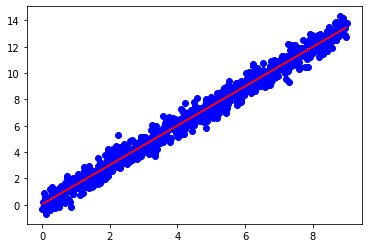

In [8]:
plt.scatter(x, y, color = 'blue')
plt.plot(X_test, y_pred, color = 'red')
plt.show()

In [9]:
m, c

(1.4945190990103705, 0.029937103281976855)

### Using SKLEARN Library

In [10]:
from sklearn.linear_model import LinearRegression

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [11]:
lr.coef_, lr.intercept_

(array([1.494871]), 0.027882832346038278)

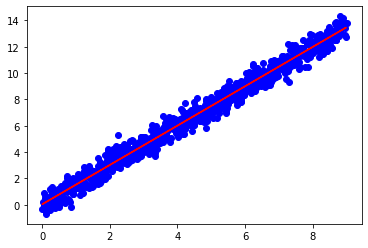

In [12]:
plt.scatter(x, y, color = 'blue')
plt.plot(X_test, y_pred_lr, color = 'red')
plt.show()

### Inferences


Coefficient of gradient descent : 1.4945190990103705
Intercept : 0.029937103281976855



Sklearn 
  - coeff : 1.494871
  - intercept : 0.027882832346038278

### TIRALS (ERRORS)



In [13]:
# def linear_regression_gradient_descent(X, y, learning_rate, num_of_iter):
#   # Slope and intercept with random values
#   m = np.random.randn(X.shape[0])
#   c = np.random.randn()

#   for i in range(num_of_iter):
#     # Predicted values
#     y_pred = (X * m) + c
    
#     # Gradients of slope and intercept
#     dm = - (2/X.shape[0]) * np.dot(X.T, (y - y_pred))
#     dc = - (2/X.shape[0]) * np.sum(y - y_pred)

#     # update
#     m = m - learning_rate * dm
#     c = c - learning_rate * dc

#   return m, c

# m, c = linear_regression_gradient_descent(x, y, 0.01, 1000)
# y_pred = predict(X_test, m, c)

# y_pred